# 股市資料蒐集、爬蟲



## 取得證交所資料
1. 進入證交所網址：https://www.twse.com.tw/zh/index.html
2. 使用開發者模式取得請求資料網址

### 匯入套件

In [ ]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

### 取得證交所上市公司個股日成交資訊

In [ ]:
# "台新新光"股票代號
stock_id = '2887'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = 20241101

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20251221


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/12/01,"65,276,984","1,197,575,425",18.10,18.50,18.10,18.35,+0.30,"8,304"
1,114/12/02,"116,002,082","2,178,983,666",18.40,19.00,18.40,18.80,+0.45,"15,083"
2,114/12/03,"40,924,438","767,680,188",18.80,18.85,18.65,18.75,-0.05,"7,305"
3,114/12/04,"111,375,134","2,118,472,252",18.85,19.15,18.80,19.15,+0.40,"15,449"
4,114/12/05,"53,864,742","1,033,033,867",19.15,19.25,19.10,19.25,+0.10,"8,165"
5,114/12/08,"47,822,504","923,687,612",19.25,19.35,19.10,19.10,-0.15,"7,157"
6,114/12/09,"49,134,594","943,502,028",19.10,19.25,19.05,19.25,+0.15,"7,850"
7,114/12/10,"34,663,836","665,199,364",19.15,19.25,19.15,19.15,-0.10,"7,221"
8,114/12/11,"54,517,465","1,049,771,197",19.30,19.35,19.15,19.25,+0.10,"8,274"
9,114/12/12,"96,605,558","1,850,792,240",19.30,19.50,19.25,19.40,+0.15,"12,270"


### 抓取特定某段時間區間 9/10~9/15
為了比較時間區間，必須要把「日期」欄位轉圜為 Pandas 中的 datetime 格式

In [ ]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.114/12/10 -> 2024/12/10
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2025/12/01'
end_date = '2025/12/10'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

print(filtered_df)

          日期         成交股數           成交金額    開盤價    最高價    最低價    收盤價   漲跌價差  \
0 2025-12-01   65,276,984  1,197,575,425  18.10  18.50  18.10  18.35  +0.30   
1 2025-12-02  116,002,082  2,178,983,666  18.40  19.00  18.40  18.80  +0.45   
2 2025-12-03   40,924,438    767,680,188  18.80  18.85  18.65  18.75  -0.05   
3 2025-12-04  111,375,134  2,118,472,252  18.85  19.15  18.80  19.15  +0.40   
4 2025-12-05   53,864,742  1,033,033,867  19.15  19.25  19.10  19.25  +0.10   
5 2025-12-08   47,822,504    923,687,612  19.25  19.35  19.10  19.10  -0.15   
6 2025-12-09   49,134,594    943,502,028  19.10  19.25  19.05  19.25  +0.15   
7 2025-12-10   34,663,836    665,199,364  19.15  19.25  19.15  19.15  -0.10   

     成交筆數  
0   8,304  
1  15,083  
2   7,305  
3  15,449  
4   8,165  
5   7,157  
6   7,850  
7   7,221  


### 取得連續月份資料
以個股本益比為例

In [ ]:
# 設定查找時間
date_list = ['20251001', '20251101', '20251201']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    # https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
    # https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date=20240303&stockNo=2303
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        # 取得證交所網站資
        stock_data = requests.get(url)

        # 將結果轉換 JSON 格式
        json_data = stock_data.json()

        # 將 JSON 格式轉換爲 Dataframe 格式，
        # 方便在 Python 中處理結構化資料
        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        # 添加新數據
        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        # 發生錯誤時，列印錯誤訊息
        print(f'無法取得{date}的資料, 可能資料量不足.')


# 輸出前 5 筆資料
print(all_df)

            日期 殖利率(%)  股利年度    本益比 股價淨值比  財報年/季
0   114年10月01日   4.95   113  13.00  1.21  114/2
1   114年10月02日   4.95   113  13.00  1.21  114/2
2   114年10月03日   4.93   113  13.04  1.21  114/2
3   114年10月07日   4.89   113  13.14  1.22  114/2
4   114年10月08日   4.88   113  13.18  1.22  114/2
5   114年10月09日   4.79   113  13.43  1.25  114/2
6   114年10月13日   4.85   113  13.25  1.23  114/2
7   114年10月14日   4.74   113  13.57  1.26  114/2
8   114年10月15日   4.55   113  14.14  1.31  114/2
9   114年10月16日   4.58   113  14.04  1.30  114/2
10  114年10月17日   4.64   113  13.86  1.28  114/2
11  114年10月20日   4.56   113  14.11  1.31  114/2
12  114年10月21日   4.57   113  14.07  1.30  114/2
13  114年10月22日   4.56   113  14.11  1.31  114/2
14  114年10月23日   4.62   113  13.93  1.29  114/2
15  114年10月27日   4.68   113  13.75  1.27  114/2
16  114年10月28日   4.74   113  13.57  1.26  114/2
17  114年10月29日   4.74   113  13.57  1.26  114/2
18  114年10月30日   4.76   113  13.50  1.25  114/2
19  114年10月31日   4.81   113  13.36  1.24

## 使用 Yahoo Finance 取得資料

###匯入套件

In [ ]:
!pip install yfinance

In [ ]:
# yahoo finance 套件
import yfinance as yf
# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

In [ ]:
# 輸入股票代號
stock_id = "2887.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去90天）
start = end - dt.timedelta(days=90)

'''抓取特定時間'''
# start = dt.datetime(2025, 9, 22)  # 指定的開始日期
# end = dt.datetime(2025, 12, 19)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-1731079308.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2025-09-22,17.500000,17.549999,17.400000,17.450001,49975775
1,2025-09-23,17.650000,17.650000,17.400000,17.450001,67279470
2,2025-09-24,17.750000,17.799999,17.650000,17.650000,61154916
3,2025-09-25,17.700001,18.100000,17.700001,17.799999,130971315
4,2025-09-26,17.799999,17.850000,17.600000,17.799999,50372387
...,...,...,...,...,...,...
56,2025-12-15,19.350000,19.500000,19.150000,19.299999,73495135
57,2025-12-16,20.049999,20.150000,19.200001,19.250000,431426855
58,2025-12-17,21.250000,21.600000,20.150000,20.200001,638166560
59,2025-12-18,21.299999,21.700001,21.200001,21.650000,551299847


# <b>資料可視化</b>

## 可視化收盤價折線圖

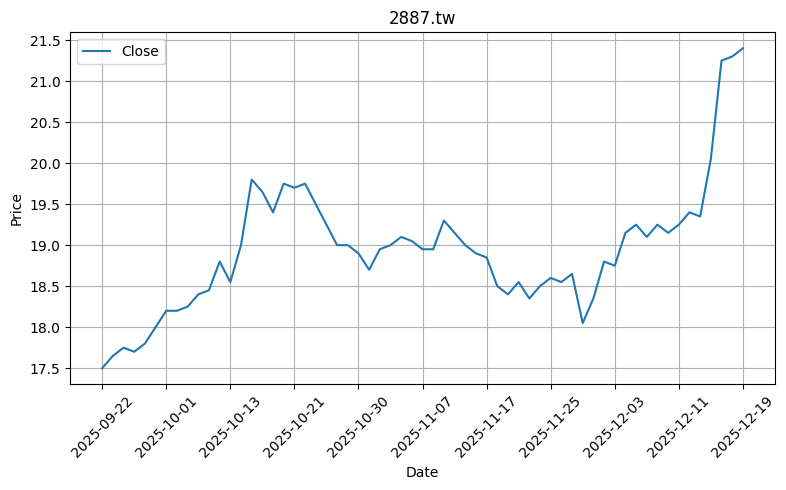

In [ ]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(8, 5))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 用 BeautifulSoup4 取得 Yahoo 股市資料

### ⚠️ 如果過度頻繁爬取證交所的資料(約連續50次)會被偵測並封鎖IP，可以搭配time、sleep延遲回應避免被認為是機器人程式。

###匯入套件

In [ ]:
# 用來處理時間
from datetime import datetime, timedelta
# 解析網頁內容
from bs4 import BeautifulSoup

### 取得股價資料

In [ ]:
def yahoo_stock(stock_id):
    # 取得證交所網站資，帶入網址參數 date：時間，stock_id：股票代號
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'

    # 使用 requests 取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用 Beautiful Soup 解析 HTML 內容
    soup = BeautifulSoup(html, 'html.parser')

    # 使用 find 與 find_all 定位 HTML 的標籤
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 time
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 ul li
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')

    # 欄位資料
    fields = []
    # 放資料
    datas = []

    # 使用 for 迴圈取得表格中細部內容
    for table_soup in table_soups:

        # 表格中的 span 標籤
        table_datas = table_soup.find_all('span')

        for num, table_data in enumerate(table_datas):

            if table_data.text == '': # 表格內容空就跳過
                continue

            # 新增資料
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)

    # 建立 DataFrame
    df = pd.DataFrame([datas], columns=fields)

    # 增加日期和股號欄位
    df.insert(0,'日期',time_element['datatime'])
    df.insert(1,'股號',stock_id)

    # 回傳 DataFrame
    return df


'''main'''

# "台新新光"股票代號
stock_id = '2887'

# 呼叫定義函數
yahoo_stock(stock_id)

,日期,股號,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,2025/12/19 14:30,2887,21.40,21.10,21.90,21.10,21.58,105.60,21.30,0.47%,0.10,"489,254","551,215",3.76%


###取得季報表資訊


In [ ]:
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
words = url.split('/')
print(words)

k = words[-1]
print(k)

['https:', '', 'tw.stock.yahoo.com', 'quote', '2887', 'income-statement']
income-statement


In [ ]:
# 函數可用於奇摩財報
def url_find(url):

    # 取得 url 的所有 route
    words = url.split('/')

    # 取得最後一個 route
    # 為了知道是損益表、資產負債表、現金流量表
    laset_word = words[-1]

    # 使用requests取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用Beautiful Soup解析HTML內容
    soup = BeautifulSoup(html, 'html.parser')

    # 找到表格的表頭 qsp-incom-statment-table
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})

    # 找到對應類別標籤
    table_fields=table_soup.find('div', class_='table-header')

    # 解析表頭內容
    table_fields_lines = list(table_fields.stripped_strings)


    # 找到對應的資料
    data_rows = table_soup.find_all('li' ,class_='List(n)')

    # 解析資料行內容
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)

    # 建立 DataFrame
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

'''main'''

# 抓損益表
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
# 抓資產負債表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/balance-sheet'
# 抓現金流量表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

# 抓取季報表資料
df = url_find(url).transpose()

# 資料處理
df.columns = df.iloc[0]
df = df[1:]
df.insert(0, '年度/季別', df.index)
df.columns.name = None
df.reset_index(drop=True, inplace=True)

# 輸出資料後5筆
print(df)

      年度/季別        營業收入        營業毛利        營業費用        營業利益        稅後淨利
0   2025 Q3  44,909,658  29,855,248  16,668,438  13,186,810  12,410,828
1   2025 Q2  19,974,961  16,270,330   9,430,601   6,839,729   5,489,921
2   2025 Q1  24,763,234  15,079,586   9,337,846   5,741,740   4,732,423
3   2024 Q4  20,438,441  13,757,738   9,855,926   3,901,812   3,404,812
4   2024 Q3  23,485,694  16,772,469   9,472,826   7,299,643   6,083,481
5   2024 Q2  21,364,301  15,438,506   9,049,051   6,389,455   5,564,858
6   2024 Q1  21,319,814  14,630,422   8,565,207   6,065,215   5,011,849
7   2023 Q4  16,706,492  11,544,083   8,676,078   2,868,005   2,500,189
8   2023 Q3  16,474,284  12,583,953   8,391,965   4,191,988   3,219,001
9   2023 Q2  17,514,621  12,790,445   8,082,449   4,707,996   3,820,270
10  2023 Q1  19,222,653  13,703,955   7,749,025   5,954,930   5,064,417
11  2022 Q4  19,040,406  14,200,303   7,483,431   6,716,872   6,592,168
12  2022 Q3  16,425,232  12,346,453   7,526,980   4,819,473   3,